┌ Info: Recompiling stale cache file /home/david.lin/.julia/compiled/v1.2/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/david.lin/.julia/compiled/v1.2/ImageMagick/0LbNX.ji for ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1240


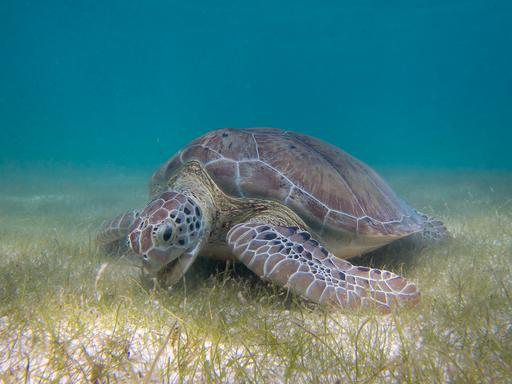

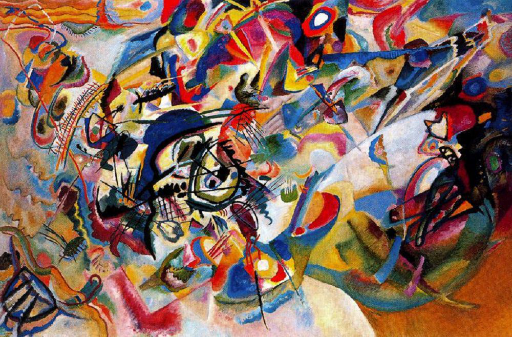

In [1]:
using Images

CONTENT_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/Green_Sea_Turtle_grazing_seagrass.jpg"
STYLE_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg"

content_img = load(CONTENT_URL)
style_img = load(STYLE_URL)

ratio = 512 / max(size(content_img)...)
content_img = imresize(content_img, ratio=ratio)
ratio = 512 / max(size(style_img)...)
style_img = imresize(style_img, ratio=ratio)

display(content_img)
display(style_img)

┌ Info: Recompiling stale cache file /home/david.lin/.julia/compiled/v1.2/StyleTransfer/PbjJi.ji for StyleTransfer [585f4c16-dfb6-11e9-10bd-b5efeb05374f]
└ @ Base loading.jl:1240
┌ Info: Building the CUDAnative run-time library for your sm_70 device, this might take a while...
└ @ CUDAnative /home/david.lin/.julia/packages/CUDAnative/Lr0yj/src/compiler/rtlib.jl:173


┣                    ┫ [0.02%, 1/5000, 00:00/00:07, 759.71i/s] 

┌ Warning: k=(Ptr{Nothing} @0x00007fe918e00000, 393216) v=55 ni=48
└ @ Knet /home/david.lin/.julia/packages/Knet/IIjk8/src/gcnode.jl:114


┣████████████████████┫ [100.00%, 5000/5000, 02:29/02:29, 33.52i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.79i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.70i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.68i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.63i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.61i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:25/02:25, 34.60i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:25/02:25, 34.60i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.61i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:24/02:24, 34.63i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:25/02:25, 34.41i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:28/02:28, 33.76i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:28/02:28, 33.74i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:29/02:29, 33.66i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:2

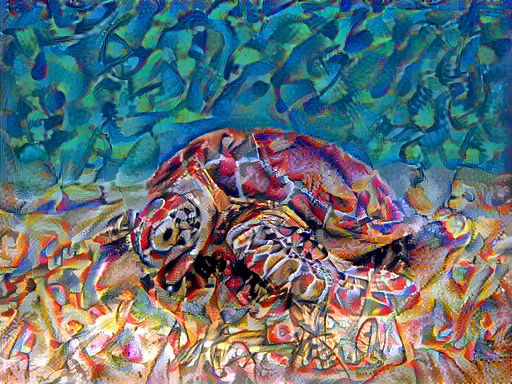

In [2]:
using StyleTransfer.Gatys2015
using Base.Iterators: take
using Printf

model = StyleTransfer(content_img, style_img)

losses= []
curr_img = content_img

mkpath("tmp/Gatys2015-1/outputs")
for (i, (img, loss)) in take(enumerate(model(content_img)), 20)
    push!(losses, loss)
    curr_img = img
    save("tmp/Gatys2015-1/outputs/$( @sprintf("%04d", i) ).png", map(clamp01nan, img))
end

display(curr_img)